In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error,r2_score


In [3]:
df = pd.read_excel('Agriculture data.xlsx')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
print(df.isnull().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [8]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [9]:
df.head(1000)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
995,33,23,45,20.002190,85.836182,7.116539,112.337046,pomegranate
996,4,14,41,19.851393,89.807323,6.430163,102.818636,pomegranate
997,13,17,45,21.254336,92.650589,7.159521,106.278467,pomegranate
998,39,24,39,23.653741,93.326575,6.431266,109.807618,pomegranate


In [10]:
df.tail(10)

,N,P,K,temperature,humidity,ph,rainfall,label
2190,103,40,30,27.309018,55.196224,6.348316,141.483164,coffee
2191,118,31,34,27.548230,62.881792,6.123796,181.417081,coffee
2192,106,21,35,25.627355,57.041511,7.428524,188.550654,coffee
2193,116,38,34,23.292503,50.045570,6.020947,183.468585,coffee
2194,97,35,26,24.914610,53.741447,6.334610,166.254931,coffee
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [11]:
data=pd.DataFrame(df)
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [12]:
dataMapping={
              "rice" :1,
              "maize":2,
              "chickpea":3,   
              "kidneybeans":4,"pigeonpeas":5,"mothbeans":6,"mungbean":7,"blackgram":8,"lentil":9,"promegranate":10,
               "banana":11,"mango":12,"grapes":13,"watermelon":14,"muskumelon":15,"apple":16,"orange":17,"papaya":18,"coconut":19,"cotton":20,
                "jute":21,"coffee":22
                 }

In [13]:
data['labels']=data['label'].map(dataMapping)
data

,N,P,K,temperature,humidity,ph,rainfall,label,labels
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1.0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1.0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1.0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1.0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1.0
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22.0
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22.0
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22.0
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22.0


In [14]:
data['label']=data['labels']
data

,N,P,K,temperature,humidity,ph,rainfall,label,labels
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1.0,1.0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1.0,1.0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1.0,1.0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1.0,1.0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1.0,1.0
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,22.0,22.0
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,22.0,22.0
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,22.0,22.0
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,22.0,22.0


In [15]:
data.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label          float64
labels         float64
dtype: object

In [16]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall,label,labels
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2000.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,11.400000,11.400000
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,6.600135,6.600135
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,1.000000,1.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,5.750000,5.750000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,11.500000,11.500000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,17.250000,17.250000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,22.000000,22.000000


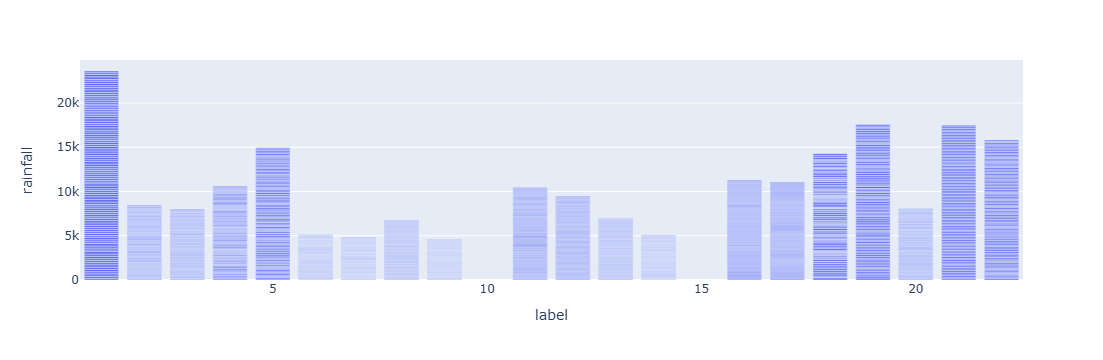

In [38]:
figure =px.bar(data_frame =data, x="label",y="rainfall")
figure.show()

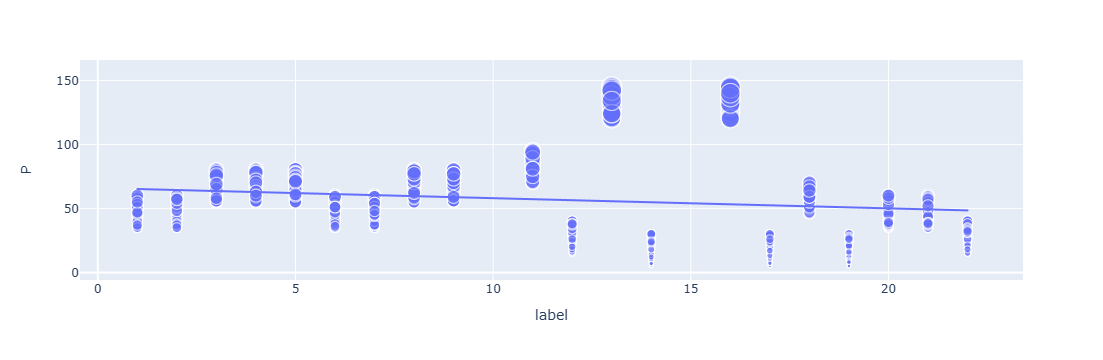

In [18]:
figure =px.scatter(data_frame =data, x="label",y="P",size="P",trendline="ols")
figure.show()



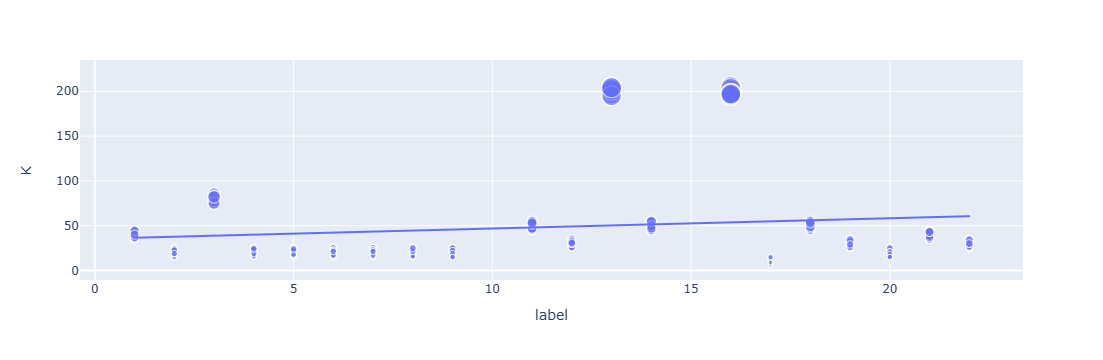

In [19]:
figure =px.scatter(data_frame =data, x="label",y="K",size="K",trendline="ols")
figure.show()



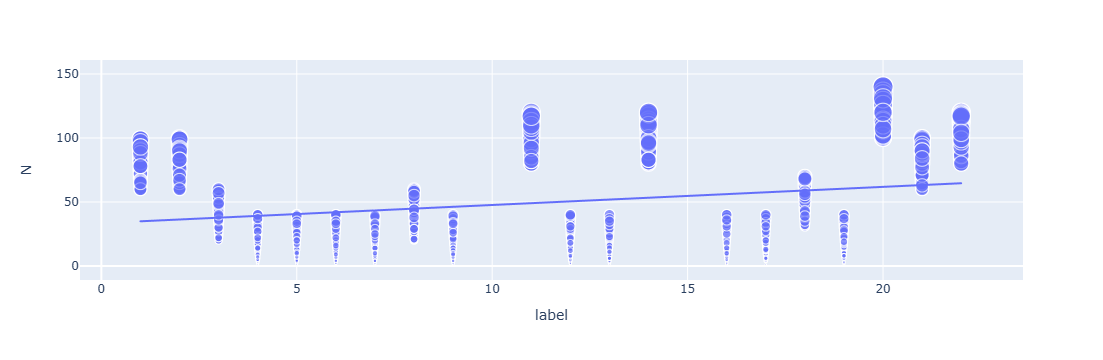

In [20]:
figure =px.scatter(data_frame =data, x="label",y="N",size="N",trendline="ols")
figure.show()



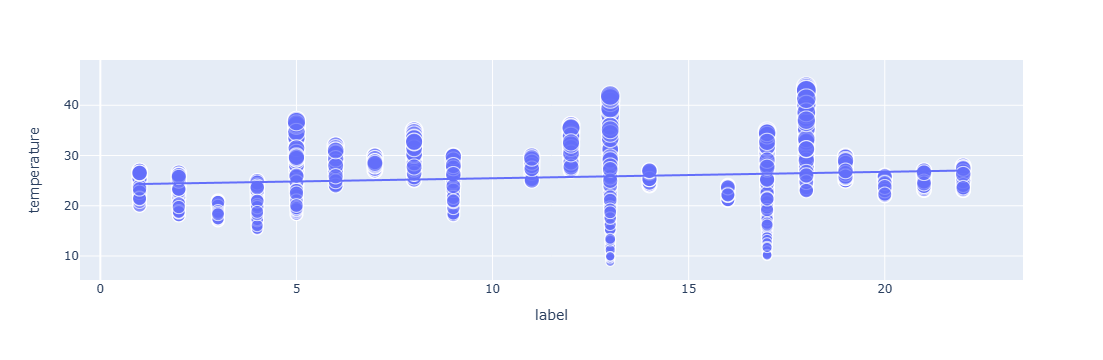

In [21]:
figure =px.scatter(data_frame =data, x="label",y="temperature",size="temperature",trendline="ols")
figure.show()



C:\Users\Kavya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Kavya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



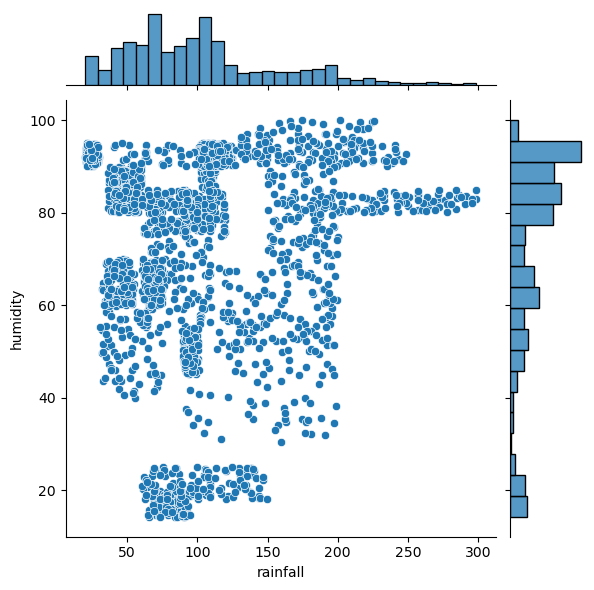

In [22]:
import seaborn as sns
sns.jointplot(x=data['rainfall'],y=data['humidity'])


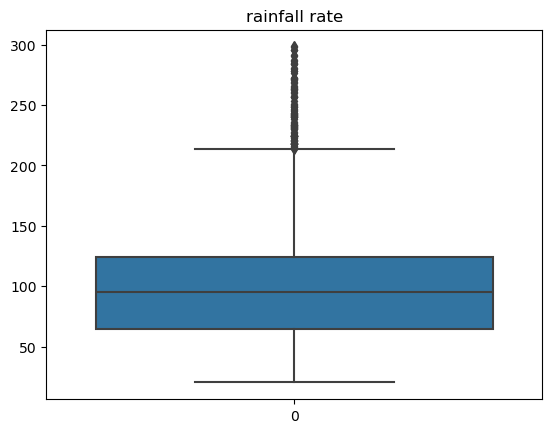

In [23]:
ax =sns.boxplot(data['rainfall'])
ax.set_title("rainfall rate")
plt.show(ax)

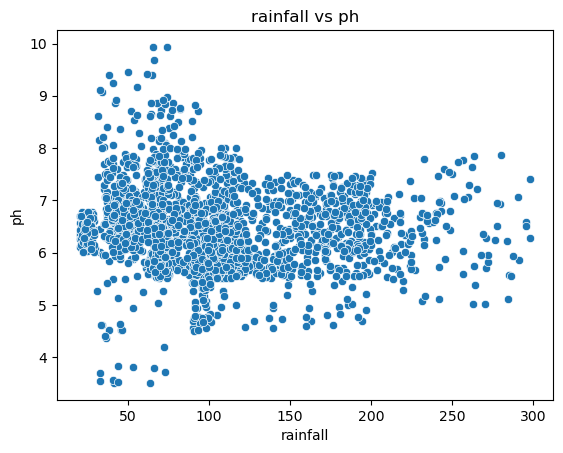

In [25]:
ax=sns.scatterplot(x='rainfall',y='ph',data=data)
ax.set_title('rainfall vs ph')
plt.show(ax)

In [27]:
correlation=data.corr()
correlation

,N,P,K,temperature,humidity,ph,rainfall,label,labels
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,0.258350,0.258350
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,-0.161697,-0.161697
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,0.142445,0.142445
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,0.163158,0.163158
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,0.534766,0.534766
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,0.056687,0.056687
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,0.169051,0.169051
label,0.258350,-0.161697,0.142445,0.163158,0.534766,0.056687,0.169051,1.000000,1.000000
labels,0.258350,-0.161697,0.142445,0.163158,0.534766,0.056687,0.169051,1.000000,1.000000


In [28]:
correlation= data.corr()
print(correlation["humidity"])

N              0.190688
P             -0.118734
K              0.190859
temperature    0.205320
humidity       1.000000
ph            -0.008483
rainfall       0.094423
label          0.534766
labels         0.534766
Name: humidity, dtype: float64


In [29]:
irrigation =["N","K","rainfall","temperature","ph"]
x=data[irrigation]
y=data.humidity

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
display(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(1760, 5)

(1760,)

(440, 5)

(440,)

In [32]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)


In [33]:
print(y_pred)
print(y_test)

[78.4345948  76.17229954 91.08459872 80.28703231 84.18699863 65.46688261
 83.58913711 61.95871835 64.17756378 55.28474129 71.81253427 65.86546293
 61.30357947 73.91694823 69.88980528 68.77358891 81.28151165 70.24137865
 77.37135715 77.92715003 78.42651069 83.77994341 53.34630509 78.268118
 69.4323872  75.39481108 66.24729901 65.15681995 64.89869942 73.99321736
 63.25508566 65.61070795 79.12741635 56.87335124 80.05530659 68.93877054
 76.67368154 62.9334168  63.46669529 56.48694361 76.55081549 69.87372019
 69.52401144 66.12522109 69.32790302 67.01808403 68.88797615 72.42685859
 76.86521318 71.40119241 74.19275052 75.50959329 80.73790664 64.70561682
 76.47441463 54.89896974 71.61657379 83.65503692 80.22886663 64.36887153
 77.45125345 69.27672629 65.2949239  57.67143828 74.10013668 69.01322693
 71.93980707 78.54487378 76.860359   61.1290533  78.78221291 71.45071183
 75.3284293  79.60462198 68.46618395 90.50591968 77.7892923  72.16430061
 79.15856134 60.91396747 75.49911144 65.76202594 73.9

In [34]:
print("R-sqr value:",r2_score(y_pred,y_test))


R-sqr value: -5.739641741083729


In [35]:
print("mean absolute error rate:",mean_absolute_error(y_pred,y_test))

mean absolute error rate: 16.092244766929458


In [36]:
print("mean squared error:",mean_squared_error(y_test,y_pred))

mean squared error: 435.8452269823098
